## Упражнения по библиотеке Numpy

In [ ]:
import numpy as np

**1.** Дан случайный массив, поменять знак у элементов, значения которых между 3 и 8

In [ ]:
# your code
arr = np.random.randint(1, 20, size=np.random.randint(1,20))

def swap_signs(arr):
    
    arr[(arr > 3) & (arr < 8)] = np.negative(arr[(arr > 3) & (arr < 8)])
    return arr

swap_signs(arr)

array([12, 11, 19, -4, -7,  9, -4])

**2.** Заменить максимальный элемент случайного массива на 0

In [ ]:
# your code

def max_to_zero(arr):
    arr[np.argmax(arr)] = 0
    return arr

max_to_zero(arr)

array([12, 11,  0, -4, -7,  9, -4])

**3.** Построить прямое произведение массивов (все комбинации с каждым элементом). На вход подается двумерный массив

In [182]:
# your code
td_arr = np.random.randint(1, 20, size=(2, np.random.randint(1, 3)))

def cross_mul(arr):
    
    all_elements = np.concatenate(td_arr)
    
    combinations = np.array(np.meshgrid(all_elements,all_elements)).T.reshape(-1,2)
    return combinations

result = cross_mul(td_arr)

print(td_arr)
print(' ')
print(result)

[[10 17]
 [ 1  5]]
 
[[10 10]
 [10 17]
 [10  1]
 [10  5]
 [17 10]
 [17 17]
 [17  1]
 [17  5]
 [ 1 10]
 [ 1 17]
 [ 1  1]
 [ 1  5]
 [ 5 10]
 [ 5 17]
 [ 5  1]
 [ 5  5]]


**4.** Даны 2 массива A (8x3) и B (2x2). Найти строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B

In [25]:
# your code
A = np.random.randint(1, 20, size=(8, 3))
B = np.random.randint(1, 20, size=(2, 2))

mask = np.zeros(len(A), dtype=bool)

for b in B:
    
    contains_row_b = np.array([np.all(np.isin(b, a)) for a in A])
    mask |= contains_row_b  

result = A[mask]

print(A)
print(' ')
print(B)
print(' ')
print(result)

[[13 13 15]
 [ 3  2  8]
 [ 6 16 14]
 [ 2 18  4]
 [ 9  6 12]
 [18  7 17]
 [12  7  1]
 [ 8  6 12]]
 
[[ 9 11]
 [18 17]]
 
[[18  7 17]]


**5.** Дана 10x3 матрица, найти строки из неравных значений (например строка [2,2,3] остается, строка [3,3,3] удаляется)

In [8]:
# your code
matrix = np.random.randint(1, 3, size =(10,3))
mask = np.array([len(np.unique(row)) > 1 for row in matrix])

print(matrix)
print(' ')
print(matrix[mask])

[[1 2 2]
 [2 2 2]
 [1 1 2]
 [1 1 1]
 [2 1 2]
 [1 1 2]
 [2 1 1]
 [2 2 2]
 [1 2 2]
 [1 2 2]]
 
[[1 2 2]
 [1 1 2]
 [2 1 2]
 [1 1 2]
 [2 1 1]
 [1 2 2]
 [1 2 2]]


**6.** Дан двумерный массив. Удалить те строки, которые повторяются

In [27]:
# your code
td_arr_6 = np.random.randint(1, 3, size=(5, 3))
unique_arr = np.unique(td_arr_6, axis = 0)

print(td_arr_6)
print(' ')
print(unique_arr)

[[1 1 1]
 [2 2 1]
 [2 2 1]
 [2 1 1]
 [2 2 2]]
 
[[1 1 1]
 [2 1 1]
 [2 2 1]
 [2 2 2]]


______
______

Для каждой из следующих задач (1-5) нужно привести 2 реализации – одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная с использованием numpy (без использования питоновских циклов/map/list comprehension).


__Замечание 1.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы).

__Замечание 2.__ Для большинства задач решение занимает не больше 1-2 строк.

___

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [48]:
# your code
x = np.random.randint(0,10, size=(np.random.randint(2,5), np.random.randint(2,5)))

#без numpy 
def diagonal_nonzero(matrix):
    n_rows = len(matrix)
    n_cols = len(matrix[0])
    n = 1
    
    for i in range(min(n_rows, n_cols)):
        elem = matrix[i][i]
        if elem != 0:
            n *= elem
            
    return n 

print(x)
print('  ')
print(diagonal_nonzero(x))

[[0 8 0]
 [7 6 7]
 [9 7 7]
 [3 6 2]]
  
42


In [49]:
#С numpy
    
diagonal = np.diagonal(x)
nonzero  = diagonal[diagonal != 0]

print(x)
print('  ')
print(np.prod(nonzero))

[[0 8 0]
 [7 6 7]
 [9 7 7]
 [3 6 2]]
  
42


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [129]:
# your code
vector_1 = np.random.randint(1,3, size = (1,4))
vector_2 = np.random.randint(1,3, size = (1,4))

# без numpy

list1 = sorted([item for row in vector_1 for item in row])
list2 = sorted([item for row in vector_2 for item in row])

res = list1 == list2

print(vector_1)
print(vector_2)
print(res)

[[2 2 1 2]]
[[1 2 2 2]]
True


In [131]:
#С numpy 
res_1 = np.array_equal(np.sort(vector_1), np.sort(vector_2))

print(vector_1)
print(vector_2)
print(res_1)

[[2 2 1 2]]
[[1 2 2 2]]
True


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит ноль. 
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [58]:
# your code
x3 = np.random.randint(0,11,7)

#Без numpy
try:
    max_val = max([x3[i] for i in range(1, len(x3)) if x3[i-1] == 0])

except Exception as e:
    print("No 0's in this vector!", e)


print(x3)
print(max_val)

[8 0 1 4 2 1 0]
1


In [61]:
is_zero = x3 == 0
shifted_is_zero = np.roll(is_zero, 1)
shifted_is_zero[0] = False
elements_after_zeros = x3[shifted_is_zero]

if len(elements_after_zeros) > 0:
    max_element = elements_after_zeros.max()
else:
    max_element = "No 0's in this vector!"

print(x3)
print(max_element)

[8 0 1 4 2 1 0]
1


* __Задача 4__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [71]:
# your code
x4 = np.random.randint(1, 4, np.random.randint(5, 10))
values = []
counts = []

current_v = x4[0]
current_c = 1

for idx, el in enumerate(x4):
    if idx == 0:
        continue

    if el == current_v:
        current_c += 1
            
    else:
        values.append(current_v)
        counts.append(current_c)
        current_v = el
        current_c = 1

values.append(current_v)
counts.append(current_c)

result_tuple = (values,counts)

print(x4)
print(result_tuple)

[3 1 1 3 3 3]
([3, 1, 3], [1, 2, 3])


In [72]:
#С numpy 
values, counts = np.unique(x4, return_counts=True)
tup = (values, counts)

print(x4)
print(tup)

[3 1 1 3 3 3]
(array([1, 3]), array([2, 4]))


* __Задача 5__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы.

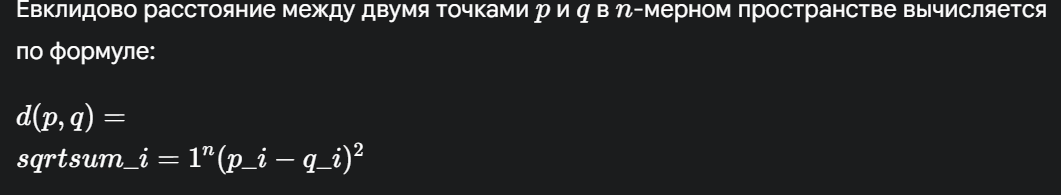

In [105]:
# your code
import math
import time

# Пример данных
X = np.random.randint(1, 7, size=(2, 2))
Y = np.random.randint(1, 7, size=(2, 2))

def euclid_length(X, Y):
    
    rows_X = len(X)
    rows_Y = len(Y)
    
    dist_matrix = [[0] * rows_Y for _ in range(rows_X)]
    
    for i in range(rows_X):
        for j in range(rows_Y):
            sum_sq = 0

            for k in range(len(X[i])):
                sum_sq += (X[i][k] - Y[j][k])**2
            dist_matrix[i][j] = math.sqrt(sum_sq)
            
    return dist_matrix

start_time = time.time()
dist_matrix = euclid_length(X, Y)
end_time = time.time()

for row in dist_matrix:
    print(row)
print(f"Время выполнения: {end_time - start_time:f} сек")
print(f"X = {X}")
print(f"Y = {Y}")

[2.0, 4.123105625617661]
[4.0, 3.0]
Время выполнения: 0.000060 сек
X = [[4 6]
 [6 2]]
Y = [[6 6]
 [3 2]]


In [106]:
def euclid_length_np(X, Y):
    return np.linalg.norm(X[:, np.newaxis] - Y, axis=2)

dist_matrix_norm = euclid_length_np(X, Y)
print(dist_matrix_norm)

[[2.         4.12310563]
 [4.         3.        ]]


In [108]:
from scipy.spatial import distance

start_time = time.time()

for row in distance.cdist(X, Y, 'euclidean'):
    print(row)
    
end_time = time.time()

print(f"Время выполнения: {end_time - start_time:f} сек")
print(f"X = {X}")
print(f"Y = {Y}")

[2.         4.12310563]
[4. 3.]
Время выполнения: 0.001406 сек
X = [[4 6]
 [6 2]]
Y = [[6 6]
 [3 2]]


_______
________

* #### __Задача 6__: CrunchieMunchies __*__

Вы работаете в отделе маркетинга пищевой компании MyCrunch, которая разрабатывает новый вид вкусных, полезных злаков под названием **CrunchieMunchies**.

Вы хотите продемонстрировать потребителям, насколько полезны ваши хлопья по сравнению с другими ведущими брендами, поэтому вы собрали данные о питании нескольких разных конкурентов.

Ваша задача - использовать вычисления Numpy для анализа этих данных и доказать, что ваши **СrunchieMunchies** - самый здоровый выбор для потребителей.


In [109]:
import numpy as np

1. Просмотрите файл cereal.csv. Этот файл содержит количества калорий для различных марок хлопьев. Загрузите данные из файла и сохраните их как calorie_stats.

In [110]:
calorie_stats = np.loadtxt("./data/cereal.csv", delimiter=",")
calorie_stats

array([ 70., 120.,  70.,  50., 110., 110., 110., 130.,  90.,  90., 120.,
       110., 120., 110., 110., 110., 100., 110., 110., 110., 100., 110.,
       100., 100., 110., 110., 100., 120., 120., 110., 100., 110., 100.,
       110., 120., 120., 110., 110., 110., 140., 110., 100., 110., 100.,
       150., 150., 160., 100., 120., 140.,  90., 130., 120., 100.,  50.,
        50., 100., 100., 120., 100.,  90., 110., 110.,  80.,  90.,  90.,
       110., 110.,  90., 110., 140., 100., 110., 110., 100., 100., 110.])

2. В одной порции CrunchieMunchies содержится 60 калорий. Насколько выше среднее количество калорий у ваших конкурентов?

Сохраните ответ в переменной average_calories и распечатайте переменную в терминале

In [155]:
# your code
crunchie_calories  = 60.0
avg_enemy_calories = np.mean(calorie_stats)

print(f'среднее кол-во калорий = {avg_enemy_calories.round(0)}, выше нашего продука на {(avg_enemy_calories - crunchie_calories).round(0)} калорий')

среднее кол-во калорий = 107.0, выше нашего продука на 47.0 калорий


3. Корректно ли среднее количество калорий отражает распределение набора данных? Давайте отсортируем данные и посмотрим.

Отсортируйте данные и сохраните результат в переменной calorie_stats_sorted. Распечатайте отсортированную информацию

In [117]:
# your code
calorie_stats_sorted = np.sort(calorie_stats)
calorie_stats_sorted

array([ 50.,  50.,  50.,  70.,  70.,  80.,  90.,  90.,  90.,  90.,  90.,
        90.,  90., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 110., 110., 110.,
       110., 110., 110., 110., 110., 110., 110., 110., 110., 110., 110.,
       110., 110., 110., 110., 110., 110., 110., 110., 110., 110., 110.,
       110., 110., 110., 110., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 130., 130., 140., 140., 140., 150., 150., 160.])

4. Похоже, что большинство значений выше среднего. Давайте посмотрим, является ли медиана наиболее корректным показателем набора данных.

Вычислите медиану набора данных и сохраните свой ответ в median_calories. Выведите медиану, чтобы вы могли видеть, как она сравнивается со средним значением.


In [123]:
median_calories = np.median(calorie_stats)
median_calories

110.0

5. В то время как медиана показывает, что по крайней мере половина наших значений составляет более 100 калорий, было бы более впечатляюще показать, что значительная часть конкурентов имеет более высокое количество калорий, чем CrunchieMunchies.

Рассчитайте различные процентили и распечатайте их, пока не найдете наименьший процентиль, превышающий 60 калорий. Сохраните это значение в переменной nth_percentile.

In [145]:
# your code
nth_percentile = np.percentile(calorie_stats, 4)
nth_percentile

70.0

6. Хотя процентиль показывает нам, что у большинства конкурентов количество калорий намного выше, это неудобная концепция для использования в маркетинговых материалах.

Вместо этого давайте подсчитаем процент хлопьев, в которых содержится более 60 калорий на порцию. Сохраните свой ответ в переменной more_calories и распечатайте его

In [150]:
# your code
more_calories = (np.sum(calorie_stats > 60.0) / len(calorie_stats)) * 100
more_calories.round(0)

96.0

7. Это действительно высокий процент. Это будет очень полезно, когда мы будем продвигать CrunchieMunchies. Но один вопрос заключается в том, насколько велики различия в наборе данных? Можем ли мы сделать обобщение, что в большинстве злаков содержится около 100 калорий или разброс еще больше?

Рассчитайте величину отклонения, найдя стандартное отклонение, Сохраните свой ответ в calorie_std и распечатайте на терминале. Как мы можем включить эту ценность в наш анализ?

In [156]:
# your code
calorie_std = np.std(calorie_stats)
calorie_std

#Данные имеют умеренный разброс

19.35718533390827

8. Напишите короткий абзац, в котором кратко изложите свои выводы и то, как, по вашему мнению, эти данные могут быть использованы в интересах Mycrunch при маркетинге CrunchieMunchies.

Среднее по рынку = 107 калл, 96% конкурентов на рынке имеют выше каллорийность, нежели наш продукт. Нужно делать акцент на низкой калорийности, ЗОЖ и ПП, сравнивая с худшими конкурентами

In [178]:
r = np.array([[1,2],[11,22]])

print(r)
print(" ")
print(" ")
print(np.stack(np.meshgrid(*r), axis = -1))

[[ 1  2]
 [11 22]]
 
 
[[[ 1 11]
  [ 2 11]]

 [[ 1 22]
  [ 2 22]]]
